## ホールドアウト法と交差検証法
- 線形回帰モデルの汎化誤差をホールドアウト法と交差検証法によってそれぞれ評価する

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.metrics import mean_absolute_error # 回帰問題における性能評価に関する関数

### 1. データの読み込み 

In [2]:
df_diamond = pd.read_csv("../1_data/diamond_data.csv")

#ダイヤモンドの重さの単位であるカラットとその価格に関する疑似データ。
display(df_diamond.head())
df_diamond.describe()

,carat,price
0,0.30,1302
1,0.30,1510
2,0.30,1510
3,0.30,1260
4,0.31,1641


,carat,price
count,308.000000,308.000000
mean,0.630909,5019.483766
std,0.277183,3403.115715
min,0.180000,638.000000
25%,0.350000,1625.000000
50%,0.620000,4215.000000
75%,0.850000,7446.000000
max,1.100000,16008.000000


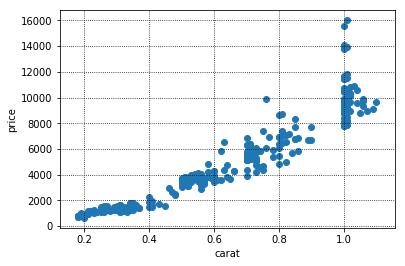

In [3]:
x = df_diamond["carat"].values
y = df_diamond["price"].values

plt.scatter(x, y, marker='o')
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.ylabel('price')
plt.xlabel('carat')
plt.show()

### 2. ホールドアウト法
- データを事前に学習用とテスト用に分割し、テスト用データで学習済みモデルの汎化誤差を評価する方法のこと

In [4]:
X = x.reshape(-1,1) # scikit-learnに入力するために整形
test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）

- `X_train` : 学習用データの説明変数
- `X_test` : テスト用データの説明変数
- `y_train` : 学習用データの目的変数
- `y_test` : テスト用データの目的変数

In [6]:
# 学習用データを使って線形回帰モデルを学習
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)

# 学習用データに対する予測を実行
y_pred_train = regr.predict(X_train)

# 学習データに対するMAEを計算（訓練誤差の評価）
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE = %s"%round(mae,3) )

MAE = 707.119


In [7]:
# テストデータに対する予測を実行
y_pred_test = regr.predict(X_test)

# テストデータに対するMAEを計算（汎化誤差の評価）
mae = mean_absolute_error(y_test, y_pred_test)
print("MAE = %s"%round(mae,3) )

MAE = 855.624


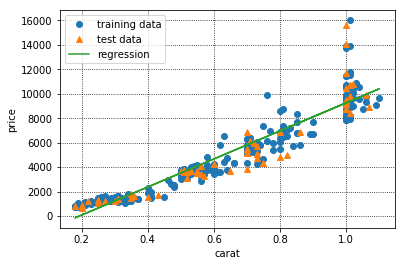

In [8]:
# グラフに重ねて表示する
plt.plot(X_train, y_train, 'o', label='training data')
plt.plot(X_test, y_test, '^', label='test data')
plt.ylabel("price")
plt.xlabel("carat")
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(X_train, y_pred_train, label='regression')
plt.legend(loc='best')
plt.show()

### 3. 交差検証（クロスバリデーション）法
- 交差検証法とは、データを複数のグループにわけ、テスト役と学習役を交代させていくことで少ないデータでも汎化誤差を評価する方法

In [10]:
X = x.reshape(-1,1) # scikit-learnに入力するために整形
n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
    # 学習用データを使って線形回帰モデルを学習
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train, y_train)

    # テストデータに対する予測を実行
    y_pred_test = regr.predict(X_test)
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(y_test, y_pred_test)
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print()
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))

Fold 1
MAE = 855.624

Fold 2
MAE = 663.313

Fold 3
MAE = 555.675

Fold 4
MAE = 803.69

Fold 5
MAE = 874.072

Cross Validation MAE = 750.475
